# EDA NR

## Librerías

In [2]:
import pandas as pd
import os
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import seaborn as sns


# Creación del dataset
#### Unión de dos archivos de layouts, uno con latitud y longitu y otro con el resto de la info

In [6]:
df1 = pd.read_csv('layoutsWithTags.csv')
df2 = pd.read_csv('layout_mas.csv', encoding='latin1')

layouts_todo = pd.merge(df1, df2, on='layout_id')
print(layouts_todo.head())


   trial_id  layout_id country_x relevant (new) tags  coincidencia  \
0    9446.0      53750    Brazil           2,4,5,6,8          True   
1    9479.0      53772    Brazil          2,4,5,6,11          True   
2    9692.0      53808       USA                 NaN          True   
3    9692.0      53808       USA            1,3,4,10          True   
4    9672.0      53817       USA                 NaN          True   

              field_name              location country_y  latitude  longitude  \
0              LRV_Milho  State of Mato Grosso    Brasil   -12.680    -56.921   
1   Sertanopolis - Milho       State of Paraná    Brasil   -23.058    -51.039   
2                 CF2225                  Iowa       USA    41.878    -93.097   
3                 CF2225                  Iowa       USA    41.878    -93.097   
4  CF2223_B1_10ft_Normal                  Iowa       USA    41.878    -93.097   

       flight_date  
0  2/24/2022 15:32  
1   4/7/2022 16:11  
2  6/28/2022 13:55  
3  6/28/

## Unión dataset Layouts con dataset de fotos

In [7]:
import os
import pandas as pd
from PIL import Image

layouts_todo = merged_df
directorio = './clean_images'

filas = []

# Obtener una lista de todas las imágenes en el directorio
imagenes_en_directorio = [filename for filename in os.listdir(directorio)]

# Iterar sobre cada imagen en el directorio
for filename in imagenes_en_directorio:
    # Obtener el layout_id de la imagen a partir del nombre del archivo
    layout_id = int(filename.split('_')[0])
    
    # Buscar la información del diseño (layout) en layouts_todo que coincida con el layout_id
    layout_info = layouts_todo[layouts_todo['layout_id'] == layout_id].iloc[0]
    
    # Obtener información relevante del diseño (layout)
    country = layout_info['country_x']
    relevant = layout_info['relevant (new) tags']
    coincidencia = layout_info['coincidencia']
    field_name = layout_info['field_name']
    location = layout_info['location']
    latitude = layout_info['latitude']
    longitude = layout_info['longitude']
    flight_date = layout_info['flight_date']
    
    # Abrir la imagen y obtener su tamaño, brillo y saturación
    img = Image.open(os.path.join(directorio, filename))
    ancho, alto = img.size
    brillo = img.getextrema()[0][0]
    s, _, _ = img.convert('HSV').split()
    estadisticas_saturacion = ImageStat.Stat(s)
    saturacion = estadisticas_saturacion.mean[0]
    
    # Agregar la información a la lista de filas
    filas.append({
        'trial_id': layout_info['trial_id'],
        'layout_id': layout_id,
        'country': country,
        'relevant (new) tags': relevant,
        'coincidencia': coincidencia,
        'nombre_imagen': filename,
        'ancho': ancho,
        'alto': alto,
        'brillo': brillo,
        'tonalidad': 0,  # Se deja en 0 porque no se proporciona en el código original
        'saturacion': saturacion,
        'field_name': field_name,
        'location': location,
        'latitude': latitude,
        'longitude': longitude,
        'flight_date': flight_date
    })

# Crear el DataFrame nuevo_df2
nuevo_df2 = pd.DataFrame(filas)



# Descripción del dataset

In [15]:
print("El dataset está compuesto por",len(nuevo_df2),"imágenes")
print("Ancho - Mínimo:", nuevo_df2['ancho'].min())
print("Ancho - Máximo:", nuevo_df2['ancho'].max())
print("Alto - Mínimo:", nuevo_df2['alto'].min())
print("Alto - Máximo:", nuevo_df2['alto'].max())
print("Cantidad de ubicaciones:", len(nuevo_df2['location'].unique()))
ubicaciones_por_pais = nuevo_df2.groupby('country')['location'].unique()

for pais, ubicaciones in ubicaciones_por_pais.items():
    total_ubicaciones = len(ubicaciones)
    print(f"País: {pais}")
    print(f"Total de regiones: {total_ubicaciones}")
    print("Regiones:")
    for ubicacion in ubicaciones:
        print(f"- {ubicacion}")
    print()



El dataset está compuesto por 1978 imágenes
Ancho - Mínimo: 565
Ancho - Máximo: 3044
Alto - Mínimo: 22
Alto - Máximo: 209
Cantidad de ubicaciones: 42
País: Argentina
Total de regiones: 10
Regiones:
- ARBA
- Las Cejas
- Chacabuco, BA
- Pergamino
- Manuel Ocampo
- Carlos Casares, BA
- Corral de Bustos
- La Cruz
- Rio Cuarto
- Las Varillas

País: Brazil
Total de regiones: 26
Regiones:
- Pontão RS
- Tibagi
- Palma Sola
- Imbituva
- Guarapuava
- Santo Augusto
- Castro pr
- Mamborê
- Londrina FX1 - 5
- Paulínia - SP
- Ipiranga
- State of Mato Grosso
- State of Paraná
- Toledo
- Medianeira
- Araguari
- Santa Terezinha Itaipu
- Campo Mourão
- Floresta
- Ivatuba
- Santa Mariana
- Aral Moreira
- Rolândia
- Palotina
- Sidrolândia
- Sertanópolis

País: USA
Total de regiones: 6
Regiones:
- Wentworth - MO
- Galva - IA
- Dallas Center - IA
- Spencer - SD
- Vermillion - SD
- Iowa



# Registro histórico de Fechas de vuelos

In [16]:
nuevo_df2['flight_date'] = pd.to_datetime(nuevo_df2['flight_date'])

nuevo_df2['year'] = nuevo_df2['flight_date'].dt.year

nuevo_df2['month'] = nuevo_df2['flight_date'].dt.month

paises_unicos = nuevo_df2['country'].unique()

tabla_vuelos = pd.DataFrame()

for pais in paises_unicos:
    df_pais = nuevo_df2[nuevo_df2['country'] == pais]
    vuelos_por_mes = df_pais.groupby(['year', 'month']).size().reset_index(name='count')

    vuelos_por_mes['country'] = pais
    tabla_vuelos = pd.concat([tabla_vuelos, vuelos_por_mes])
tabla_vuelos = tabla_vuelos[['country', 'year', 'month', 'count']]

print(tabla_vuelos)

     country  year  month  count
0  Argentina  2018     11    120
1  Argentina  2019      1     34
2  Argentina  2021      1    158
3  Argentina  2021      2    253
0     Brazil  2018     10    217
1     Brazil  2018     11    159
2     Brazil  2018     12     58
3     Brazil  2019      1     20
4     Brazil  2019      2    140
5     Brazil  2019      3    160
6     Brazil  2021      4     20
7     Brazil  2022      2     20
8     Brazil  2022      4     20
0        USA  2021      5    100
1        USA  2021      6     39
2        USA  2022      6    440
3        USA  2022      7     20


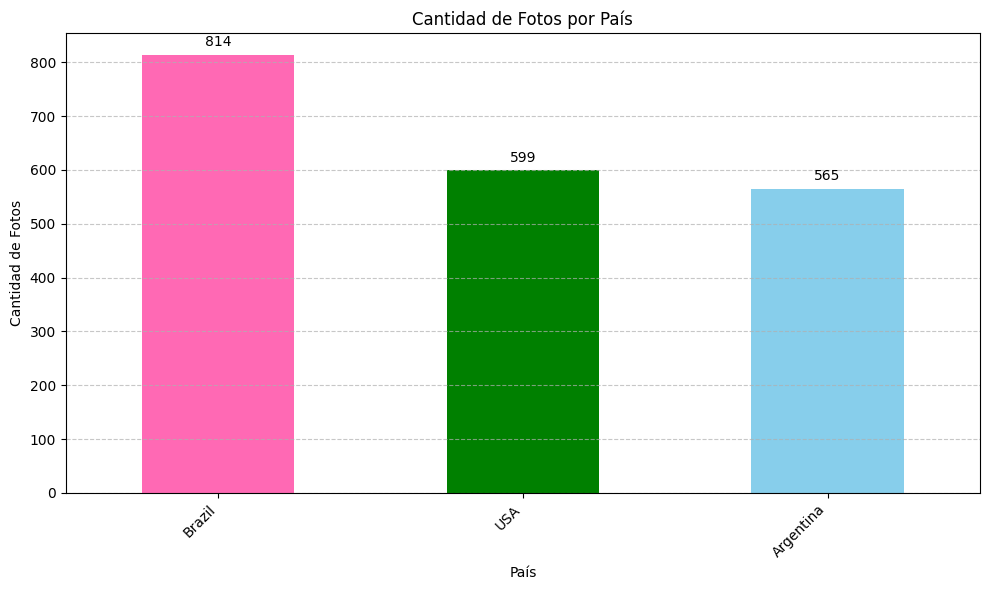

In [25]:
import matplotlib.pyplot as plt

# Definir colores por país
colores = {'Brazil': '#FF69B4', 'USA': 'green', 'Argentina': '#87CEEB'}

# Contar la cantidad de fotos por país
conteo_paises = nuevo_df2['country'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

ax = conteo_paises.plot(kind='bar', color=[colores.get(x, '#skyblue') for x in conteo_paises.index])

# Etiquetar cada barra con su valor correspondiente
for i, v in enumerate(conteo_paises):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Fotos por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Fotos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


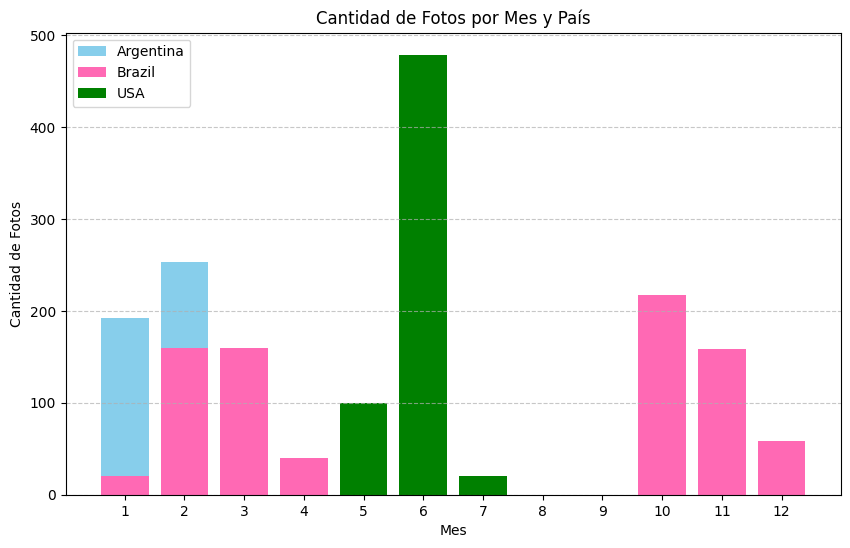

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los colores por país
colores = {'Brazil': '#FF69B4', 'USA': 'green', 'Argentina': '#87CEEB'}

# Agrupar por mes y país y sumar el conteo
monthly_counts = tabla_vuelos.groupby(['month', 'country'])['count'].sum().unstack()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

for country in monthly_counts.columns:
    plt.bar(monthly_counts.index, monthly_counts[country], color=colores[country], label=country)

plt.xlabel('Mes')
plt.ylabel('Cantidad de Fotos')
plt.title('Cantidad de Fotos por Mes y País')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
